# Operations Research and Management MGT1060
Prof. Balaji J  

---


# Railway Operations Optimization
* Yasir Ahmad (22MIA1064)
* Naveen N (22MIA1049)  
---

## Background Case Study:

Railway operations rely heavily on the consistent availability and reliability of trains. Maintenance tasks, such as **engine servicing** and **track alignment**, are essential to ensure safety, efficiency, and long-term performance. However, these tasks must be carried out within strict time constraints to avoid delays in operations. Given the limited resources, such as maintenance crews, equipment, and facility availability, optimizing the sequence of maintenance tasks becomes a critical challenge.

This case study addresses the scheduling of maintenance tasks for multiple trains in a railway depot. By applying the principles of Job Sequencing Problems (n-jobs, 2-machines) from Operational Research, we aim to optimize the scheduling process, ensuring timely completion of tasks while minimizing downtime.

# Digital Assignment - 3  

# Job Sequencing Problem: Optimizing Train Maintenance Operations

In this problem, we are considering a railway company's operations where two types of tasks need to be completed on each train: **Engine Servicing** and **Track Alignment**. The company wants to sequence these tasks across two machines (Machine 1 for Engine Servicing and Machine 2 for Track Alignment) in such a way that minimizes the total time required to process all jobs. The tasks for each train have different durations on each machine.

### Objective:
We aim to optimize the job sequence in order to minimize the **makespan** (the total time required to complete all jobs) and also minimize the idle time for both machines.

### Problem Setup:
- **Machine 1 (M1)**: Engine Servicing
- **Machine 2 (M2)**: Track Alignment
- **Jobs (Trains)**: The jobs are represented by trains that require different durations on both machines.

### Jobs Data:

| Job ID | Engine Servicing (M1) | Track Alignment (M2) |
|--------|-----------------------|----------------------|
| T1     | 4 hours               | 3 hours              |
| T2     | 2 hours               | 5 hours              |
| T3     | 3 hours               | 2 hours              |
| T4     | 6 hours               | 1 hour               |
| T5     | 5 hours               | 4 hours              |




In [ ]:
# Job data: Train ID, Engine Servicing (Machine 1) time, Track Alignment (Machine 2) time
jobs = [
    {"id": "T1", "M1": 4, "M2": 3},
    {"id": "T2", "M1": 2, "M2": 5},
    {"id": "T3", "M1": 3, "M2": 2},
    {"id": "T4", "M1": 6, "M2": 1},
    {"id": "T5", "M1": 5, "M2": 4},
]

# Function to apply Johnson's Algorithm for Job Sequencing with 2 Machines
def johnsons_algorithm(jobs):
    # Step 1: Separate jobs based on machine times
    jobs_m1 = [job for job in jobs if job['M1'] <= job['M2']]
    jobs_m2 = [job for job in jobs if job['M1'] > job['M2']]

    # Step 2: Sort jobs with the smallest processing time for M1 first, then M2
    jobs_m1.sort(key=lambda x: x['M1'])  # Sorting by M1 times
    jobs_m2.sort(key=lambda x: x['M2'])  # Sorting by M2 times

    # Step 3: Combine the two sorted lists to form the final sequence
    sequence = jobs_m1 + jobs_m2[::-1]  # Reverse the second list for M2 tasks

    return sequence

def calculate_schedule(sequence):
    start_M1, start_M2 = 0, 0  # Initialize start times for M1 and M2
    idle_M2 = 0               # Initialize total idle time for M2
    schedule = []

    for job in sequence:
        # Calculate when each job finishes on Machine 1
        time_in_M1 = start_M1
        time_out_M1 = time_in_M1 + job['M1']
        start_M1 = time_out_M1  # Update the start time for M1 after the job is processed

        # Calculate when each job starts on Machine 2
        time_in_M2 = max(start_M2, time_out_M1)  # M2 starts after M1 finishes or its previous job on M2 finishes
        if time_in_M2 > start_M2:
            idle_M2 += time_in_M2 - start_M2  # Increment idle time if M2 has to wait

        time_out_M2 = time_in_M2 + job['M2']
        start_M2 = time_out_M2  # Update the start time for M2 after the job is processed

        # Append the details of job, including the time in, time out, and duration for both machines
        schedule.append((job['id'], time_in_M1, time_out_M1, time_in_M2, time_out_M2, job['M1'], job['M2']))

    # Calculate idle time for M1
    last_time_out_M1 = schedule[-1][2]  # Time out on M1 for the last job
    makespan = start_M2  # The time when the last job finishes on M2
    idle_M1 = max(0, makespan - last_time_out_M1)  # Idle time for M1 is the gap between its last job and M2's last job

    return schedule, makespan, idle_M1, idle_M2


# Get the optimal job sequence using Johnson's Algorithm
optimal_sequence = johnsons_algorithm(jobs)

# Calculate the schedule, makespan, and idle times
schedule, makespan, idle_M1, idle_M2 = calculate_schedule(optimal_sequence)

# Output the results
print("***************************** Optimal Job Sequence *****************************")
print(f"Optimal Sequence of Jobs: {[job['id'] for job in optimal_sequence]}")
print("\n***************************** Maintenance Schedule *****************************")
print(f"{'Task ID':<10}{'Engine Servicing (M1)':<20}{'Track Alignment (M2)':<20}")
print(f"{'':<10}{'Time In':<10}{'Time Out':<10}{'Duration':<10}{'Time In':<10}{'Time Out':<10}{'Duration':<10}")
print("-" * 90)

for job in schedule:
    print(f"{job[0]:<10}{job[1]:<10}{job[2]:<10}{job[5]:<10}{job[3]:<10}{job[4]:<10}{job[6]:<10}")

print("\n***************************** Final Results *****************************")
print(f"Total Makespan (Completion Time): {makespan} hours")
print(f"Idle Time for Engine Servicing (M1): {idle_M1} hours")
print(f"Idle Time for Track Alignment (M2): {idle_M2} hours")


***************************** Optimal Job Sequence *****************************
Optimal Sequence of Jobs: ['T2', 'T5', 'T1', 'T3', 'T4']

***************************** Maintenance Schedule *****************************
Task ID   Engine Servicing (M1)Track Alignment (M2)
          Time In   Time Out  Duration  Time In   Time Out  Duration  
------------------------------------------------------------------------------------------
T2        0         2         2         2         7         5         
T5        2         7         5         7         11        4         
T1        7         11        4         11        14        3         
T3        11        14        3         14        16        2         
T4        14        20        6         20        21        1         

***************************** Final Results *****************************
Total Makespan (Completion Time): 21 hours
Idle Time for Engine Servicing (M1): 1 hours
Idle Time for Track Alignment (M2): 6 hours


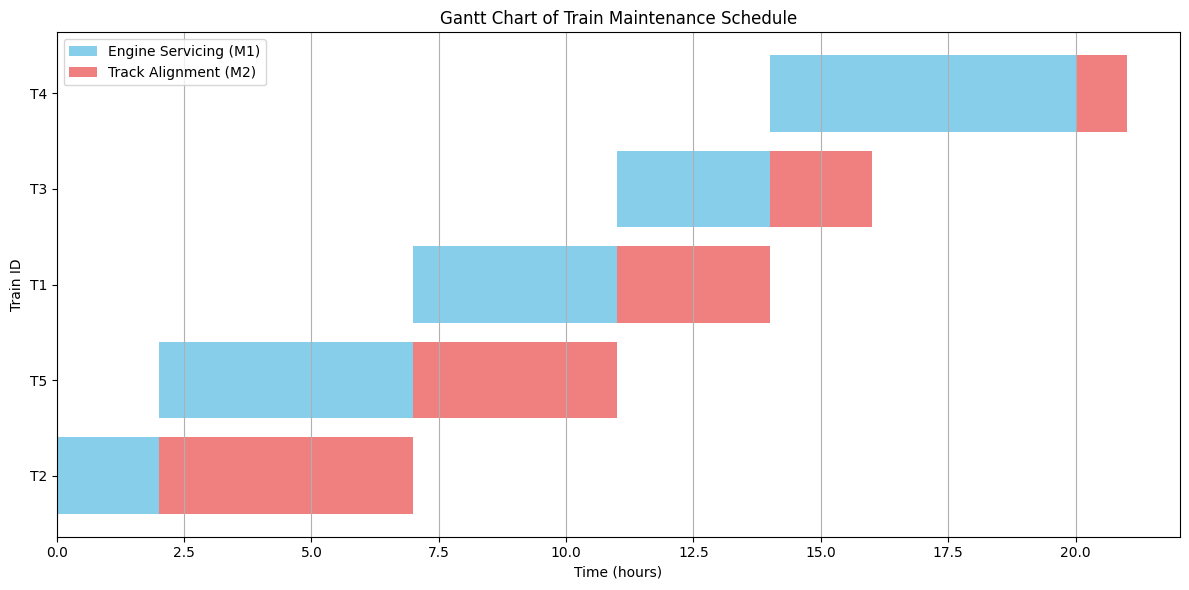


***************************** Schedule DataFrame *****************************


,Job ID,M1_Start,M1_End,M2_Start,M2_End,M1_Duration,M2_Duration
0,T2,0,2,2,7,2,5
1,T5,2,7,7,11,5,4
2,T1,7,11,11,14,4,3
3,T3,11,14,14,16,3,2
4,T4,14,20,20,21,6,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Create a DataFrame from the schedule
schedule_df = pd.DataFrame(schedule, columns=['Job ID', 'M1_Start', 'M1_End', 'M2_Start', 'M2_End', 'M1_Duration', 'M2_Duration'])

# Plotting the Gantt chart
plt.figure(figsize=(12, 6))

# Plot M1 tasks
for index, row in schedule_df.iterrows():
    plt.barh(row['Job ID'], row['M1_Duration'], left=row['M1_Start'], color='skyblue', label='Engine Servicing (M1)' if index == 0 else "")

# Plot M2 tasks
for index, row in schedule_df.iterrows():
    plt.barh(row['Job ID'], row['M2_Duration'], left=row['M2_Start'], color='lightcoral', label='Track Alignment (M2)' if index == 0 else "")

# Customize the plot
plt.xlabel("Time (hours)")
plt.ylabel("Train ID")
plt.title("Gantt Chart of Train Maintenance Schedule")
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Display the DataFrame
print("\n***************************** Schedule DataFrame *****************************")
schedule_df